# COMP1800 - Data Visualization (Coursework)
<u>Introduction</u>: The task embarked upon involves a comprehensive analysis of ChrisCo, a fictional cinema chain in the UK, through the lens of data visualization. The process entails compiling and examining data to glean insights into the company's operations, customer demographics, and financial performance. This Jupyter Notebook outlines the steps taken and achievements made using Python, specifically within a Visual Studio Code environment.

#### Setting Up a Python Environment

Setting up a dedicated Python environment is essential for managing dependencies in data science projects. You can use either Anaconda or Miniconda for this purpose.

**Creating and Activating a New Environment**:


```bash
conda create --name COMP1800-DV python=3.10.10
conda activate COMP1800-DV
```


#### Installing Required Packages

Ensure all necessary packages are installed by using a `pip install` command that references a [`requirements.txt`](../Docs/requirements.txt) file. This file lists all packages needed to run the Jupyter notebook effectively.

**Installing and Updating Packages**:
```python
%pip install --upgrade -r ../Docs/requirements.txt --quiet
```
Note that the `--quiet` flag is used to suppress any unnecessary output from package installation, which can make it easier to see when there are errors.

**Setting Up an IPython Kernel for Jupyter**:

To use the new Python environment in Jupyter, install a new IPython kernel with the environment.


```bash
python -m ipykernel install --user --name=COMP1800-DV --display-name "COMP1800-DV(IPYNB)"
conda install -n COMP1800-DV ipykernel --update-deps --force-reinstall
```


This creates a kernel named `COMP1800-DV` for Jupyter, ensuring it uses the specific Python environment created for this coursework.

In [15]:
%pip install --upgrade -r ../Docs/requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries
Importing necessary libraries needed for the this coursework.

In [71]:
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import matplotlib.dates as mdates
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    from pandas.plotting import register_matplotlib_converters

    # Setting seaborn theme for better visuals
    sns.set_theme(style="whitegrid")
except Exception as e:
    print(f"Error : {e}")

# Data Collection
Access and download the specific datasets from the provided links by replacing 'ID' with student ID number.

**Downloading  Datasets**:
```python
%run ../Datasets/download.py
```

This will download the datasets specified in coursework specificatiom into the 'Datasets' directory specified by the `directory` variable in [`download.py`](../Datasets/download.py).

In [17]:
%run ../Datasets/download.py

Downloaded and saved CinemaWeeklyVisitors.csv successfully.
Downloaded and saved CinemaAge.csv successfully.
Downloaded and saved CinemaCapacity.csv successfully.
Downloaded and saved CinemaMarketing.csv successfully.
Downloaded and saved CinemaOverheads.csv successfully.
Downloaded and saved CinemaSpend.csv successfully.


## Loading and Inspecting the Dataset
Datasets spanning weekly visitors, cinema ages, capacities, marketing expenditures, overheads, and customer spend were meticulously gathered and loaded for subsequent analysis.

In [72]:
# Load the datasets
directory = '../Datasets/'
age_df = pd.read_csv(f'{directory}CinemaAge.csv')
capacity_df = pd.read_csv(f'{directory}CinemaCapacity.csv')
marketing_df = pd.read_csv(f'{directory}CinemaMarketing.csv')
overheads_df = pd.read_csv(f'{directory}CinemaOverheads.csv')
spend_df = pd.read_csv(f'{directory}CinemaSpend.csv')
weekly_visitors_df = pd.read_csv(f'{directory}CinemaWeeklyVisitors.csv')

# Display the first few rows of each dataframe to understand their structure
display(age_df.head(), capacity_df.head(), marketing_df.head(), overheads_df.head(), spend_df.head(), weekly_visitors_df.head())

,Id,Avg age (yrs)
0,UDD,27
1,CCX,38
2,VJV,41
3,WVA,45
4,AKA,26


,Id,Seating capacity
0,UDD,163
1,CCX,30
2,VJV,449
3,WVA,181
4,AKA,43


,Id,Marketing (£000s)
0,UDD,5
1,CCX,2
2,VJV,13
3,WVA,24
4,AKA,2


,Id,Overheads (£000s)
0,UDD,65
1,CCX,18
2,VJV,87
3,WVA,58
4,AKA,13


,Id,Avg spend (£)
0,UDD,15
1,CCX,19
2,VJV,15
3,WVA,15
4,AKA,12


,Date,UDD,CCX,VJV,WVA,AKA,JJQ,SJE,WQW,ZWY,...,TJN,TPY,TVJ,SDT,WKL,CWN,XQE,VPG,YCI,RPQ
0,2019-01-01,372,0,845,923,0,163,314,160,191,...,411,436,224,0,109,0,177,927,141,326
1,2019-01-08,378,0,1012,725,0,148,303,195,165,...,442,444,342,0,123,0,160,714,125,252
2,2019-01-15,360,0,944,1174,0,151,332,183,120,...,478,517,321,0,135,0,164,902,131,402
3,2019-01-22,347,0,905,796,0,152,319,199,137,...,505,406,231,0,110,0,212,901,129,265
4,2019-01-29,387,0,975,857,0,147,301,183,146,...,486,415,262,0,128,0,157,887,136,295


# Creating Dataframes
**Summary DataFrame**: This includes one row for each cinema, with details such as average age of visitors, seating capacity, marketing spend, overheads, and average spend per visitor.

**Customer DataFrame**: This is derived from the weekly visitors data, reformatted to include one row for each date with the cinema ID and the number of weekly visitors.

In [73]:
# Create the summary dataframe by merging the individual dataframes on the 'Id' column
summary_df = pd.merge(age_df, capacity_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, marketing_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, overheads_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, spend_df, on='Id', how='inner')

# Rename columns for clarity
summary_df.columns = ['Cinema ID', 'Average Age (Years)', 'Seating Capacity', 'Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)']

# The customer dataframe will be the weekly visitors dataframe as it already represents one row per date
customer_df = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")

display(summary_df.head(), customer_df.head())

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
0,UDD,27,163,5,65,15
1,CCX,38,30,2,18,19
2,VJV,41,449,13,87,15
3,WVA,45,181,24,58,15
4,AKA,26,43,2,13,12


,Date,Cinema ID,Weekly Visitors
0,2019-01-01,UDD,372
1,2019-01-08,UDD,378
2,2019-01-15,UDD,360
3,2019-01-22,UDD,347
4,2019-01-29,UDD,387


## Exploratory Data Analysis
**Exploratory Data Analysis (EDA)**: Conduct an initial analysis to understand the dataset's structure, contents, and any immediate insights or anomalies.

Summary DataFrame Descriptive Statistics:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,35.333333,116.433333,6.633333,63.733333,16.333333
std,6.503757,102.277069,7.246799,27.406183,4.837592
min,26.000000,30.000000,1.000000,13.000000,8.000000
25%,29.250000,37.750000,2.000000,49.250000,13.000000
50%,36.000000,88.000000,5.000000,67.500000,15.000000
75%,41.000000,161.500000,7.750000,85.500000,20.750000
max,45.000000,449.000000,35.000000,99.000000,25.000000


Customer DataFrame Descriptive Statistics:


,Weekly Visitors
count,6270.000000
mean,293.387081
std,293.733774
min,0.000000
25%,125.000000
50%,176.000000
75%,380.000000
max,1492.000000



Correlation Matrix:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
Average Age (Years),1.000000,0.037670,0.200223,-0.069903,0.595856
Seating Capacity,0.037670,1.000000,0.700083,0.286457,-0.139132
Marketing Spend (£000s),0.200223,0.700083,1.000000,0.116860,0.023279
Overheads (£000s),-0.069903,0.286457,0.116860,1.000000,-0.231567
Average Spend (£),0.595856,-0.139132,0.023279,-0.231567,1.000000


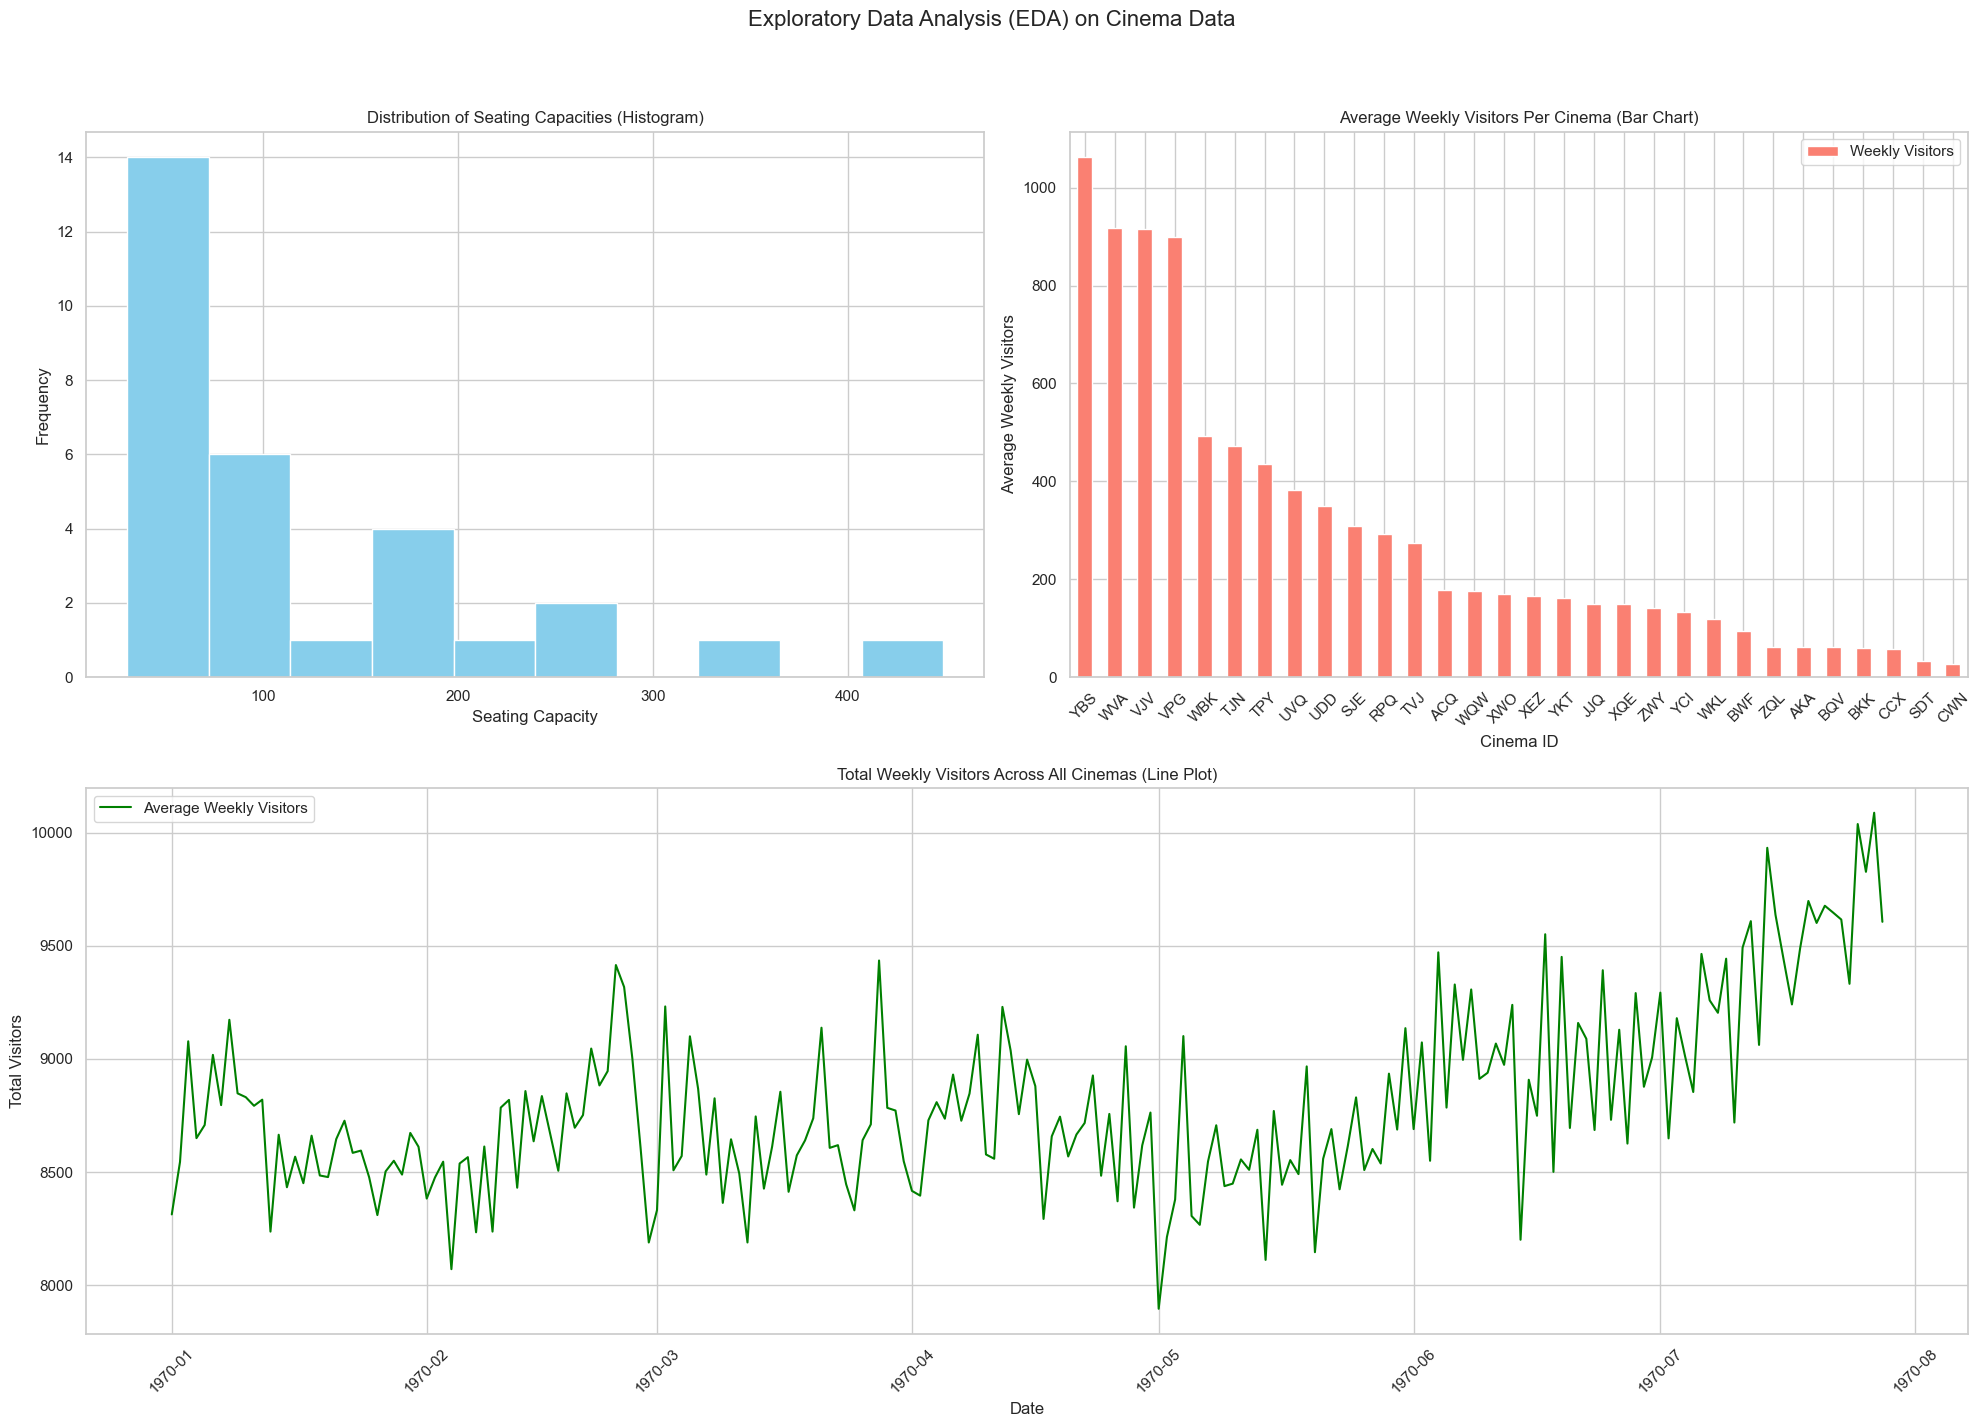

In [74]:
# Descriptive Statistics for Summary DataFrame
print("Summary DataFrame Descriptive Statistics:")
display(summary_df.describe())

# Descriptive Statistics for Summary DataFrame
print("Customer DataFrame Descriptive Statistics:")
display(customer_df.describe())

# Exclude non-numeric columns and then calculate correlation for Summary DataFrame
numeric_cols_summary_df = summary_df.select_dtypes(include=[ 'float64', 'int64' ])
print("\nCorrelation Matrix:")
display(numeric_cols_summary_df.corr())

# Set up a figure with a gridspec
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 3])
fig.suptitle('Exploratory Data Analysis (EDA) on Cinema Data', fontsize=16)

# Plot 1: Distribution of Seating Capacities
ax0 = fig.add_subplot(gs[0, 0])
summary_df['Seating Capacity'].hist(color='skyblue')
ax0.set_title('Distribution of Seating Capacities (Histogram)')
ax0.set_xlabel('Seating Capacity')
ax0.set_ylabel('Frequency')

# Plot 2: Average Weekly Visitors Per Cinema
ax1 = fig.add_subplot(gs[0, 1])
average_visits_per_cinema = customer_df.groupby('Cinema ID')['Weekly Visitors'].mean()
average_visits_per_cinema = average_visits_per_cinema.sort_values(ascending=False)
average_visits_per_cinema.plot(kind='bar', color='salmon')
ax1.set_title('Average Weekly Visitors Per Cinema (Bar Chart)')
ax1.set_xlabel('Cinema ID')
ax1.set_ylabel('Average Weekly Visitors')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 3: Total Weekly Visitors Across All Cinemas
ax2 = fig.add_subplot(gs[1, :])
total_visitors_per_week = customer_df.groupby('Date')['Weekly Visitors'].sum()
ax2.plot(total_visitors_per_week.index, total_visitors_per_week.values, label='Average Weekly Visitors', color='green')
ax2.set_title('Total Weekly Visitors Across All Cinemas (Line Plot)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Visitors')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust layout and show the dashboard
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle as needed for the title
plt.show()

---

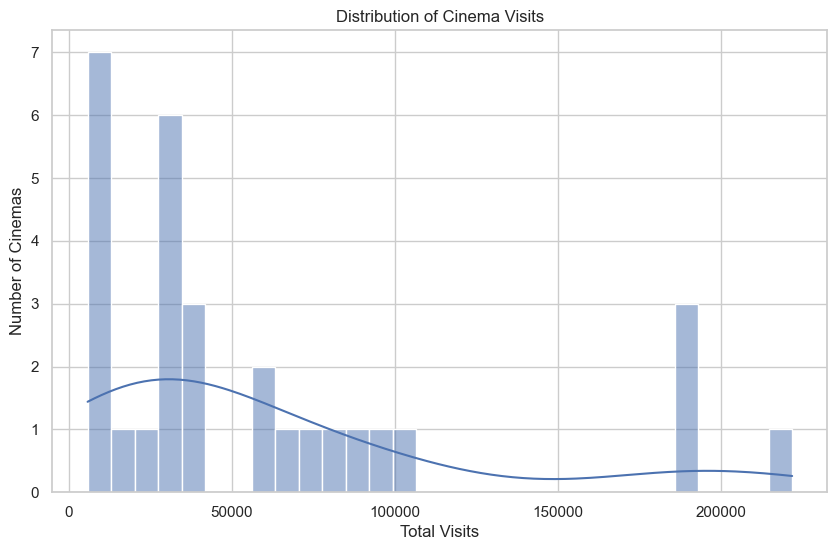

Number of High Volume Cinemas: 10
Number of Medium Volume Cinemas: 10
Number of Low Volume Cinemas: 10


In [21]:
# Calculate the total visits for each cinema over the available period
cinema_visits = customer_df.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

# Visualizing the distribution of visits across cinemas
plt.figure(figsize=(10, 6))
sns.histplot(cinema_visits['Weekly Visitors'], bins=30, kde=True)
plt.title('Distribution of Cinema Visits')
plt.xlabel('Total Visits')
plt.ylabel('Number of Cinemas')
plt.show()

# Identifying high, medium, and low volume cinemas based on total visits
quantiles = cinema_visits['Weekly Visitors'].quantile([0.33, 0.66])
low_threshold, high_threshold = quantiles[0.33], quantiles[0.66]

high_volume = cinema_visits[cinema_visits['Weekly Visitors'] > high_threshold]
medium_volume = cinema_visits[(cinema_visits['Weekly Visitors'] > low_threshold) & (cinema_visits['Weekly Visitors'] <= high_threshold)]
low_volume = cinema_visits[cinema_visits['Weekly Visitors'] <= low_threshold]

print(f"Number of High Volume Cinemas: {len(high_volume)}")
print(f"Number of Medium Volume Cinemas: {len(medium_volume)}")
print(f"Number of Low Volume Cinemas: {len(low_volume)}")

**Pairplot for High Volume Cinemas**: This plot gives us an idea of the relationships between different financial metrics. For instance, if there is a positive correlation between marketing spend and weekly visitors, it might suggest that increased marketing efforts contribute to higher footfall. Similarly, we can observe how overheads relate to marketing spend and whether a higher average spend per visitor correlates with higher total visitors. There might be outliers or clusters that are worth investigating further.

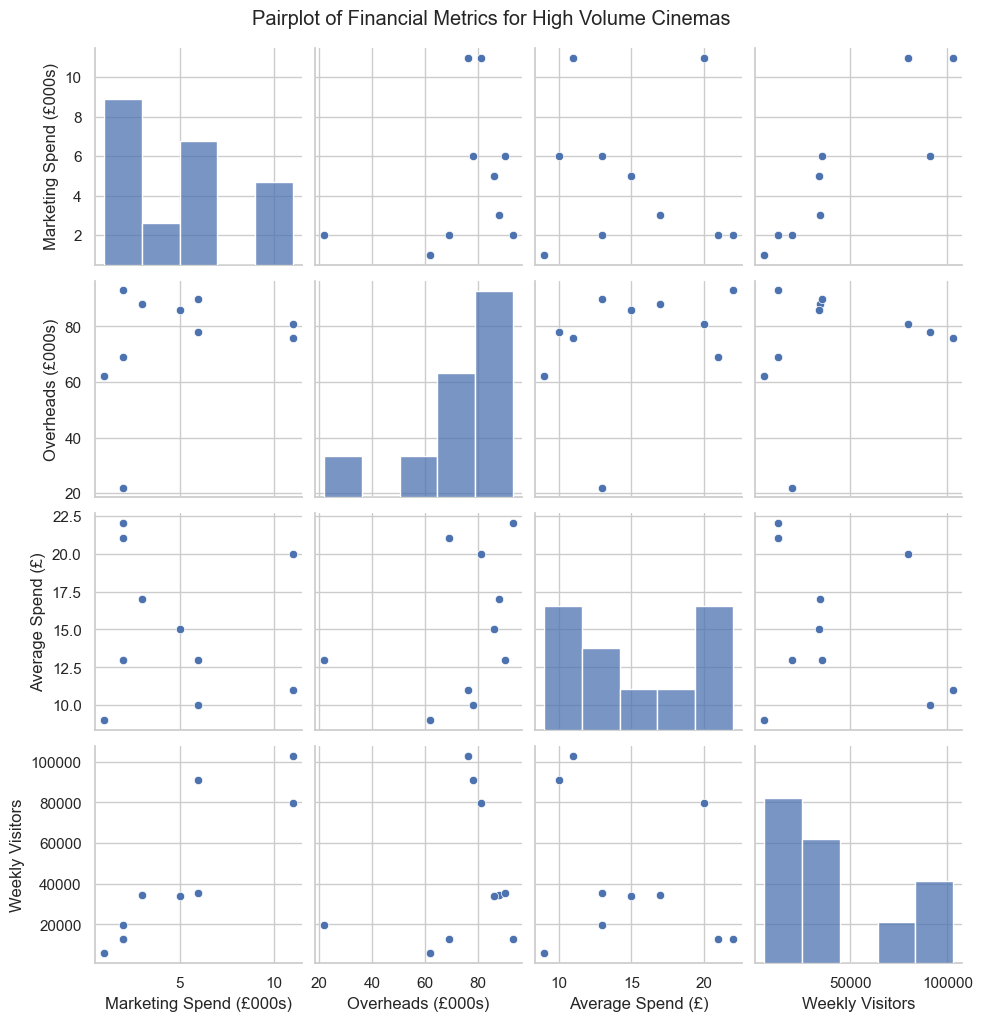

In [22]:
# Add a new column to 'summary_df' for the volume category
summary_df['Volume Category'] = pd.cut(
    cinema_visits['Weekly Visitors'], 
    bins=[-np.inf, low_threshold, high_threshold, np.inf], 
    labels=['Low', 'Medium', 'High']
)

# Merge the volume category back into the summary data
summary_df = summary_df.merge(
    cinema_visits[['Cinema ID', 'Weekly Visitors']], 
    on='Cinema ID', 
    how='left'
)

# Filter the dataframe for high volume cinemas
high_volume_df = summary_df[summary_df['Volume Category'] == 'High']

# Visualize correlations between different financial aspects for high volume cinemas
sns.pairplot(high_volume_df[['Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)', 'Weekly Visitors']])
plt.suptitle('Pairplot of Financial Metrics for High Volume Cinemas', y=1.02)
plt.show()

**Marketing Spend vs. Average Spend for Medium Volume Cinemas**: This scatter plot aims to reveal if there's a relationship between the marketing spend and the average spend per visitor. The size of the markers indicates seating capacity, while their color and size also represent the weekly visitors. This plot could suggest how effective marketing spend is in influencing visitor spending and if seating capacity is related to either metric.

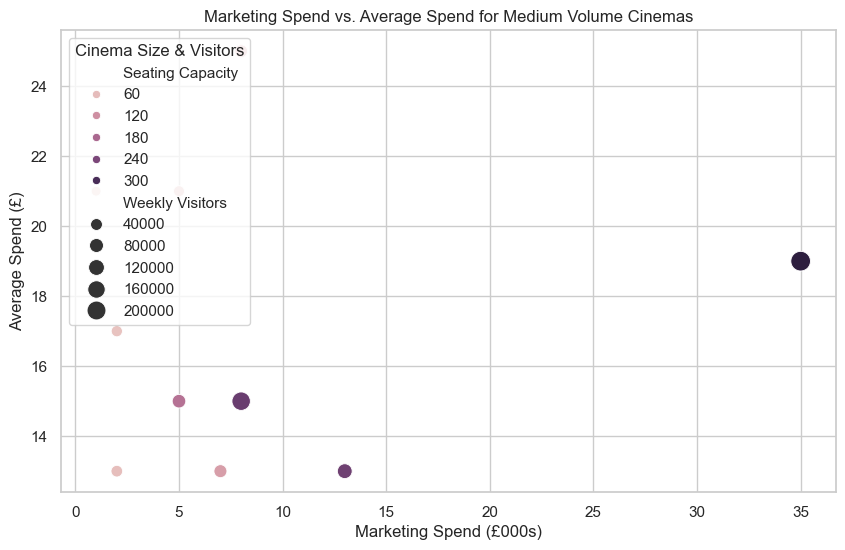

In [23]:
# Filter the dataframe for medium volume cinemas
medium_volume_df = summary_df[summary_df['Volume Category'] == 'Medium']

# Comparing marketing efficiency: marketing spend vs. average spend per visitor
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Marketing Spend (£000s)', 
    y='Average Spend (£)', 
    hue='Seating Capacity', 
    size='Weekly Visitors', 
    sizes=(50, 200), 
    data=medium_volume_df
)
plt.title('Marketing Spend vs. Average Spend for Medium Volume Cinemas')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Spend (£)')
plt.legend(title='Cinema Size & Visitors', loc='upper left')
plt.show()

**Seating Capacity vs. Average Spend for Low Volume Cinemas**: This visualization displays seating capacity against average spend per visitor for low volume cinemas, with the size of the markers representing the number of weekly visitors. A relationship between seating capacity and average spend could indicate that larger cinemas might not be capitalizing on their potential to generate higher revenue per visitor, or that despite having a high seating capacity, the visitor numbers are low.

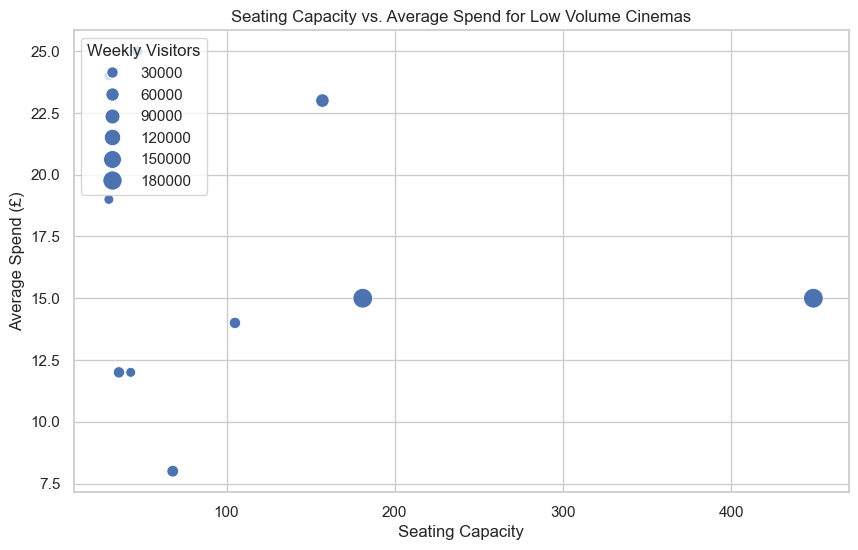

In [24]:
# Filter the dataframe for low volume cinemas
low_volume_df = summary_df[summary_df['Volume Category'] == 'Low']

# Visualize average spend vs. seating capacity for low volume cinemas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Seating Capacity', 
    y='Average Spend (£)', 
    size='Weekly Visitors', 
    sizes=(50, 200), 
    data=low_volume_df
)
plt.title('Seating Capacity vs. Average Spend for Low Volume Cinemas')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Spend (£)')
plt.legend(title='Weekly Visitors', loc='upper left')
plt.show()

**Weekly Visitors Trend**: This plot exhibits fluctuations that are common on a week-by-week basis. The variability could be due to various factors including movie releases, holidays, and other events that influence cinema attendance.

**Monthly Average Visitors Trend**: The monthly plot smoothens out the weekly variations and shows a clearer trend. It appears there's an overall upward trend in the monthly average number of visitors. However, there are periods where the number dips, which may correspond to seasonal changes or other factors.

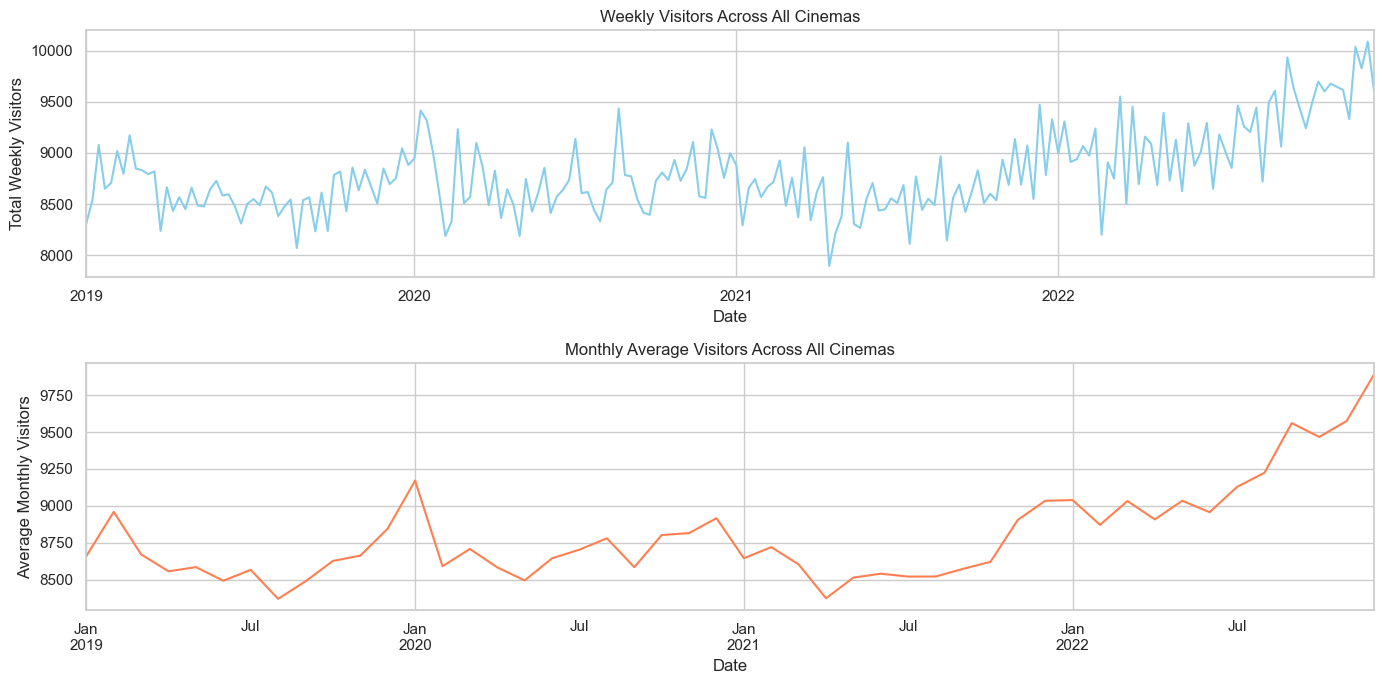

In [27]:
# Ensure 'Date' is a datetime column
customer_df['Date'] = pd.to_datetime(customer_df['Date'])

# Set 'Date' as the index of the dataframe
customer_df.index = customer_df.set_index('Date')

# Create a new dataframe to sum weekly visitors for all cinemas
total_visitors_weekly = customer_df.groupby('Date')['Weekly Visitors'].sum()

# Resample to monthly visits and calculate the mean to see the monthly trend
total_visitors_monthly = total_visitors_weekly.resample('ME').mean()

# Plotting the weekly and monthly visitor trends
plt.figure(figsize=(14, 7))

# Weekly trend plot
plt.subplot(2, 1, 1)
total_visitors_weekly.plot(title='Weekly Visitors Across All Cinemas', color='skyblue')
plt.ylabel('Total Weekly Visitors')

# Monthly trend plot
plt.subplot(2, 1, 2)
total_visitors_monthly.plot(title='Monthly Average Visitors Across All Cinemas', color='coral')
plt.ylabel('Average Monthly Visitors')

plt.tight_layout()
plt.show()

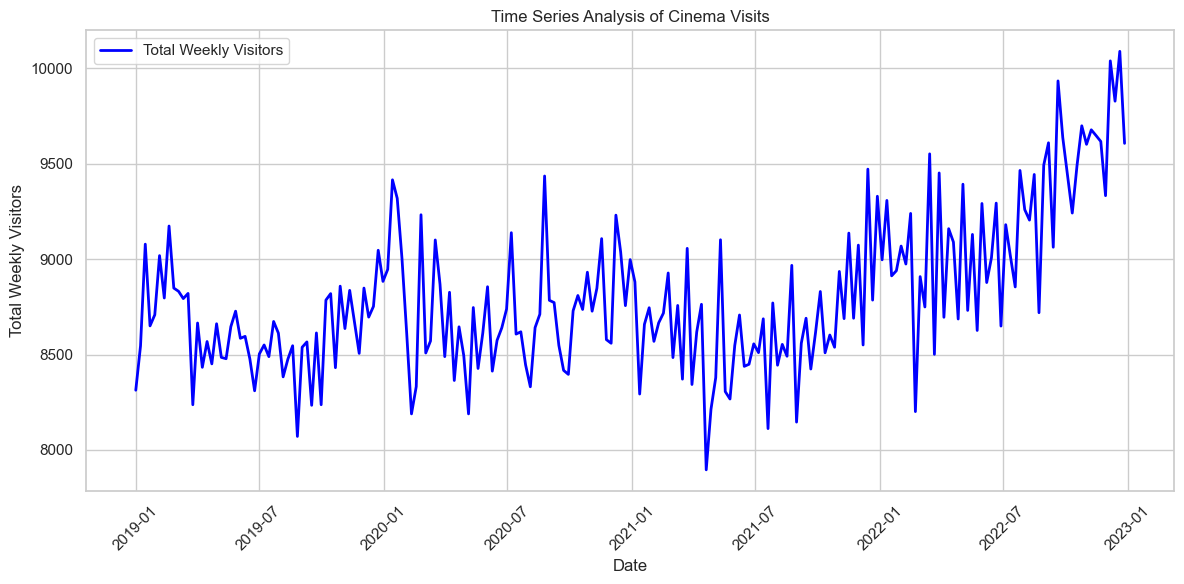

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the weekly visitors dataframe
# Assuming 'weekly_visitors_df' is already loaded and prepared as shown in your provided code

# Converting 'Date' column to datetime format for better plotting
weekly_visitors_df['Date'] = pd.to_datetime(weekly_visitors_df['Date'])

# Summing up the total visitors for each week across all cinemas
weekly_visitors_df['Total Weekly Visitors'] = weekly_visitors_df.drop(columns=['Date']).sum(axis=1)

# Plotting the Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(weekly_visitors_df['Date'], weekly_visitors_df['Total Weekly Visitors'], label='Total Weekly Visitors', color='blue', linewidth=2)
plt.title('Time Series Analysis of Cinema Visits')
plt.xlabel('Date')
plt.ylabel('Total Weekly Visitors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

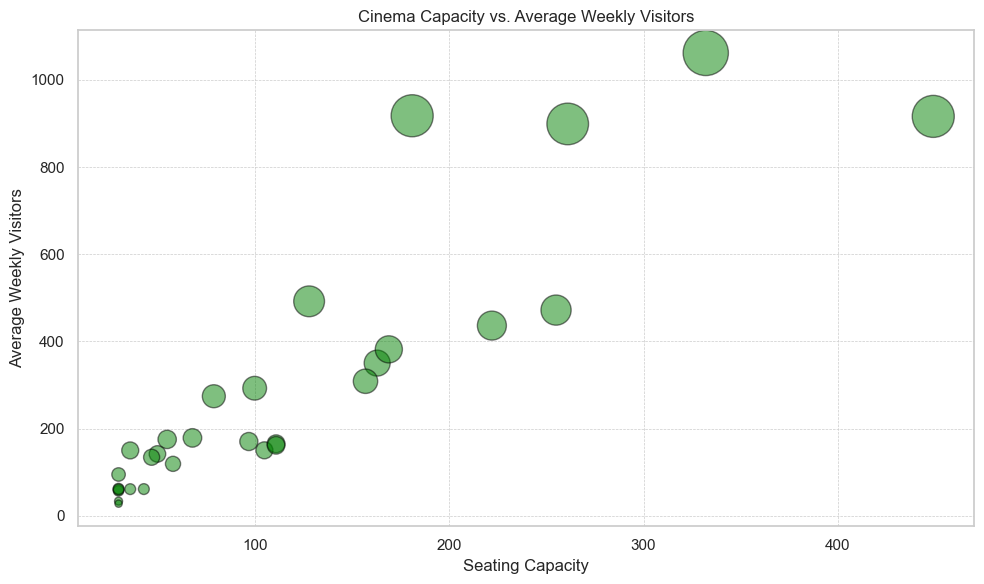

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'capacity_df', 'weekly_visitors_df' are already loaded

# Ensure the column names are consistent for the merge operation
if 'Id' in capacity_df.columns:
    capacity_df = capacity_df.rename(columns={'Id': 'Cinema ID'})

# Preparing the weekly visitors data to calculate average weekly visitors for each cinema
weekly_visitors_melted = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")
average_weekly_visitors = weekly_visitors_melted.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

# Merge the average weekly visitors with the cinema capacity data
merged_df = pd.merge(capacity_df, average_weekly_visitors, on='Cinema ID', how='inner')

# Plotting the Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Seating capacity'], merged_df['Weekly Visitors'], 
            s=merged_df['Weekly Visitors'], # Bubble size determined by average weekly visitors
            alpha=0.5, color='green', edgecolor='black', linewidth=1)

plt.title('Cinema Capacity vs. Average Weekly Visitors')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

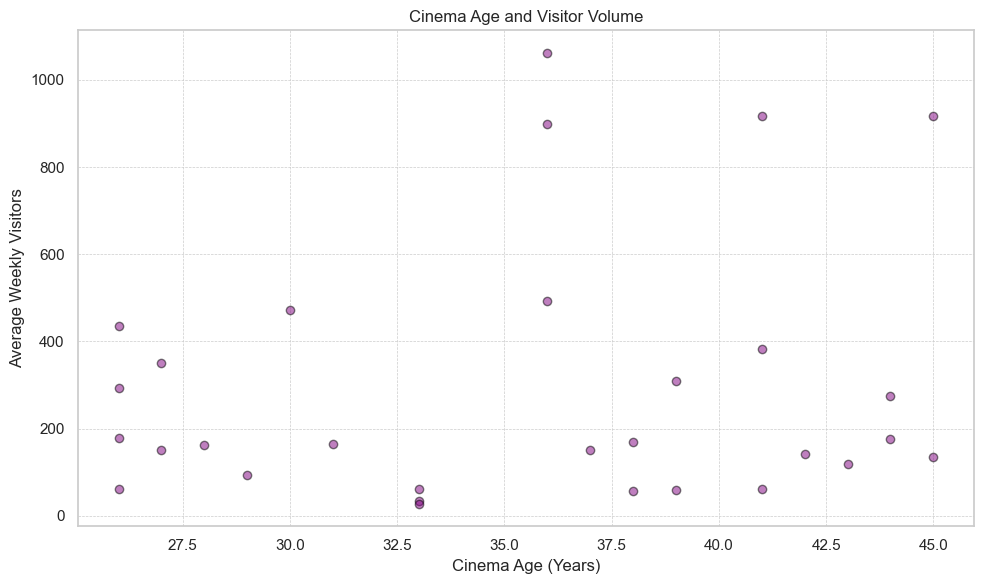

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'age_df' is already loaded with cinema age data
# and 'weekly_visitors_df' contains weekly visitor data

# Ensure the column names are consistent for the merge operation
if 'Id' in age_df.columns:
    age_df = age_df.rename(columns={'Id': 'Cinema ID'})

# Preparing the weekly visitors data to calculate average weekly visitors for each cinema
weekly_visitors_melted = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")
average_weekly_visitors = weekly_visitors_melted.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

# Merge the average weekly visitors with the cinema age data
merged_df = pd.merge(age_df, average_weekly_visitors, on='Cinema ID', how='inner')

# Plotting the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg age (yrs)'], merged_df['Weekly Visitors'], 
            color='purple', alpha=0.5, edgecolor='black', linewidth=1)

plt.title('Cinema Age and Visitor Volume')
plt.xlabel('Cinema Age (Years)')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

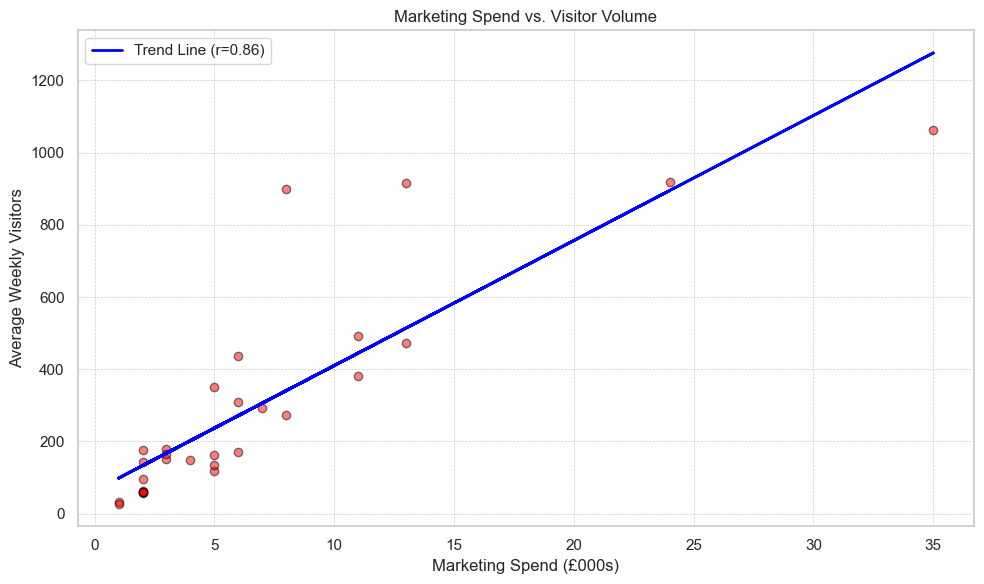

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Assuming 'marketing_df' and 'weekly_visitors_df' are already loaded

# Ensure the column names are consistent for the merge operation
if 'Id' in marketing_df.columns:
    marketing_df = marketing_df.rename(columns={'Id': 'Cinema ID'})

# Preparing the weekly visitors data to calculate average weekly visitors for each cinema
weekly_visitors_melted = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")
average_weekly_visitors = weekly_visitors_melted.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

# Merge the average weekly visitors with the marketing spend data
merged_df = pd.merge(marketing_df, average_weekly_visitors, on='Cinema ID', how='inner')

# Calculating the trend line
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Marketing (£000s)'], merged_df['Weekly Visitors'])
line = slope * merged_df['Marketing (£000s)'] + intercept

# Plotting the Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Marketing (£000s)'], merged_df['Weekly Visitors'], 
            color='red', alpha=0.5, edgecolor='black', linewidth=1)
plt.plot(merged_df['Marketing (£000s)'], line, color='blue', linewidth=2, label=f'Trend Line (r={r_value:.2f})')

plt.title('Marketing Spend vs. Visitor Volume')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Weekly Visitors')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

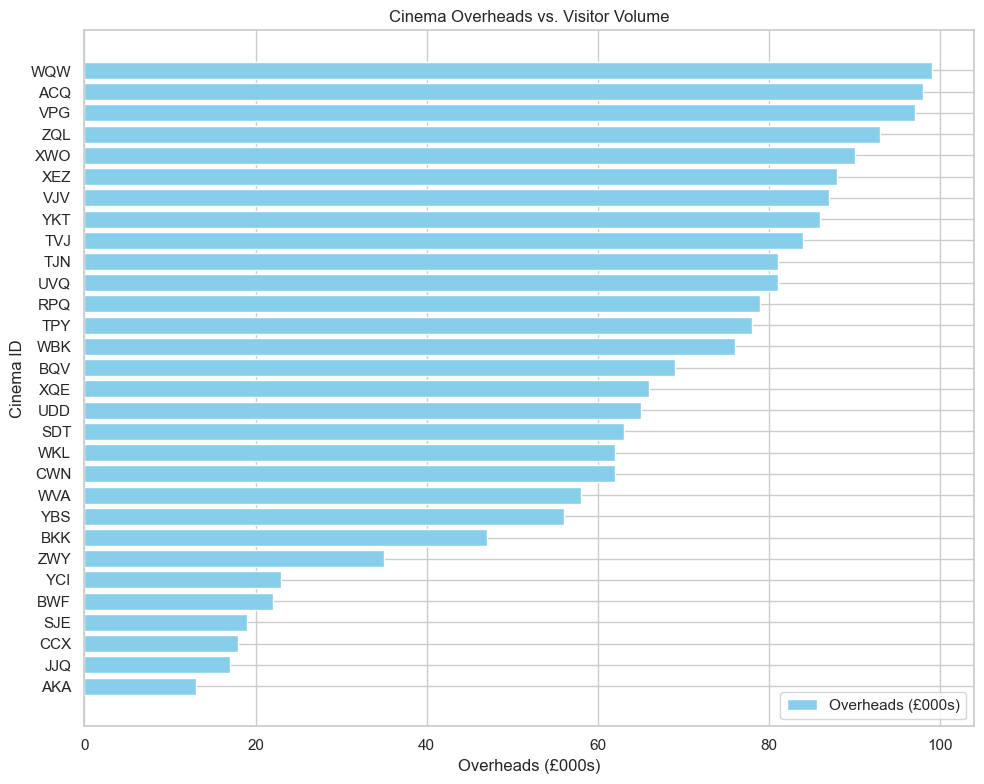

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the column names are consistent for the merge operation
# Assuming the overheads dataframe uses 'Id' for the cinema identifier
overheads_df_copy = overheads_df.rename(columns={'Id': 'Cinema ID'}).copy()

# Creating a copy of the weekly_visitors_df to calculate average weekly visitors per cinema
weekly_visitors_df_copy = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")
average_weekly_visitors = weekly_visitors_df_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

# Merge the overheads data with average weekly visitors using the corrected column name
merged_df = pd.merge(overheads_df_copy, average_weekly_visitors, on='Cinema ID', how='inner')

# Sort the merged dataframe for a meaningful visualization
merged_df_sorted = merged_df.sort_values(by='Overheads (£000s)', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(merged_df_sorted['Cinema ID'], merged_df_sorted['Overheads (£000s)'], color='skyblue', label='Overheads (£000s)')
plt.xlabel('Overheads (£000s)')
plt.ylabel('Cinema ID')
plt.title('Cinema Overheads vs. Visitor Volume')
plt.legend()
plt.tight_layout()
plt.show()

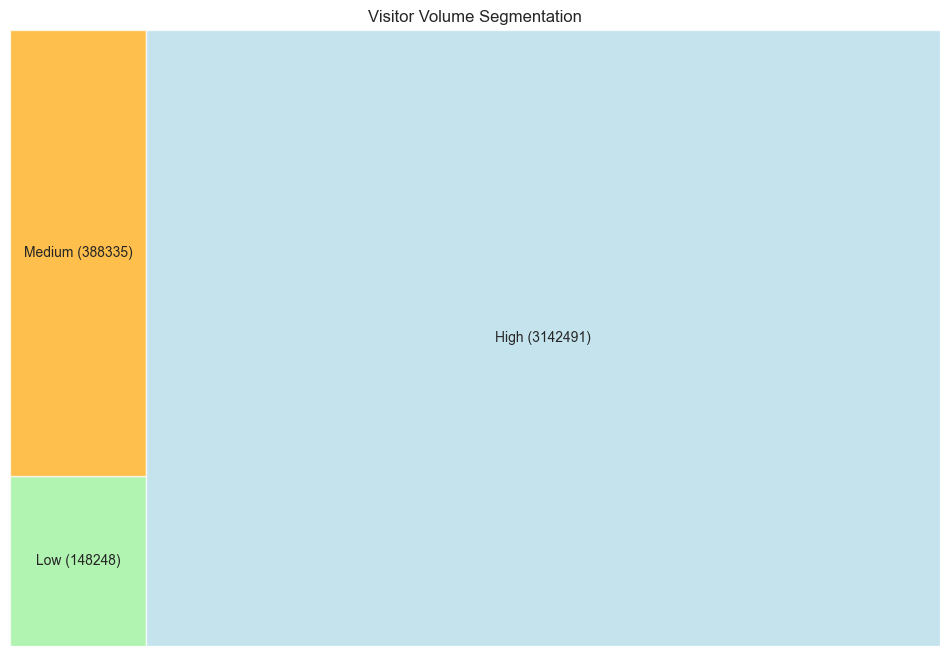

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# Assuming 'weekly_visitors_df' contains weekly visitor data

# Calculate the total visitor volume for each cinema
weekly_visitors_melted = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")
total_visitors_per_cinema = weekly_visitors_melted.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

# Categorize cinemas based on total visitor volume into 'High', 'Medium', 'Low'
total_visitors_per_cinema['Volume Category'] = pd.qcut(total_visitors_per_cinema['Weekly Visitors'], 
                                                       3, labels=['Low', 'Medium', 'High'])

# Calculate total volume per category for the treemap, adding observed=True to silence the warning
volume_per_category = total_visitors_per_cinema.groupby('Volume Category', observed=True)['Weekly Visitors'].sum().reset_index()

# Prepare data for the treemap
labels = volume_per_category.apply(lambda x: f"{x['Volume Category']} ({x['Weekly Visitors']})", axis=1)
sizes = volume_per_category['Weekly Visitors']
colors = ['lightgreen', 'orange', 'lightblue']

# Plotting the Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize':10})
plt.axis('off') # Removes the axes for a cleaner look
plt.title('Visitor Volume Segmentation')
plt.show()

In [83]:
import pandas as pd
import hvplot.pandas  # HoloViews extension for Pandas
import panel as pn
import math

# Ensure Panel extension is activated
pn.extension('tabulator', comms='vscode')

# Ensure 'Date' in weekly_visitors_df is a datetime type
weekly_visitors_df['Date'] = pd.to_datetime(weekly_visitors_df['Date'])

# Melt weekly_visitors_df for long format
visitor_data_long = weekly_visitors_df.melt(id_vars=['Date'], var_name='Cinema ID', value_name='Weekly Visitors')

# Example interactive plot for Weekly Visitors
def get_visitor_trends(cinema_id, date_range):
    df = visitor_data_long.loc[visitor_data_long['Cinema ID'] == cinema_id]
    df = df.loc[df['Date'].between(pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1]))]
    return df.hvplot.line(x='Date', y='Weekly Visitors', title=f"Weekly Visitors for Cinema {cinema_id}")

# Widgets for interactive plot
cinema_id_select = pn.widgets.Select(name='Cinema ID', options=list(visitor_data_long['Cinema ID'].unique()))
date_range_slider = pn.widgets.DateRangeSlider(name='Date Range',
                                               start=weekly_visitors_df['Date'].min(),
                                               end=weekly_visitors_df['Date'].max(),
                                               value=(weekly_visitors_df['Date'].min(), weekly_visitors_df['Date'].max()))

# Update function for interactive plot
def update_visitor_trends(event):
    cinema_id = cinema_id_select.value
    date_range = date_range_slider.value
    visitor_trends_plot.object = get_visitor_trends(cinema_id, date_range)

cinema_id_select.param.watch(update_visitor_trends, 'value')
date_range_slider.param.watch(update_visitor_trends, 'value')

visitor_trends_plot = pn.panel(get_visitor_trends(cinema_id_select.value, date_range_slider.value), sizing_mode='stretch_width')

# Layout
dashboard = pn.Column("# Cinema Performance Dashboard", pn.Row(cinema_id_select, date_range_slider), visitor_trends_plot)
dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'627c2c40-a5e9-4f93-bad1-696099d2f887': {'version…